In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7b7828bcf35f03b0fa7cdf0efdfdec9


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gumdag
Processing Record 2 of Set 1 | kloulklubed
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | turinsk
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | cap malheureux
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | hillsboro
Processing Record 15 of Set 1 | port hardy
Processing Record 16 of Set 1 | sorvag
City not found. Skipping...
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | axixa do tocantins
City not found. Skipping...
Processing Record 20 of Set 1 | korla
Processing Record 21 of Set 1 | blu

Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | solnechnyy
Processing Record 41 of Set 4 | waiouru
Processing Record 42 of Set 4 | bay roberts
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | leningradskiy
Processing Record 47 of Set 4 | hofn
Processing Record 48 of Set 4 | litovko
Processing Record 49 of Set 4 | acapulco
Processing Record 50 of Set 4 | viedma
Processing Record 1 of Set 5 | saint-francois
Processing Record 2 of Set 5 | walvis bay
Processing Record 3 of Set 5 | antofagasta
Processing Record 4 of Set 5 | viligili
City not found. Skipping...
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | sala consilina
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | camocim
Processing Record 29 of Set 8 | port hedland
Processing Record 30 of Set 8 | puri
Processing Record 31 of Set 8 | le creusot
Processing Record 32 of Set 8 | inirida
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | biltine
Processing Record 36 of Set 8 | bam
Processing Record 37 of Set 8 | pevek
Processing Record 38 of Set 8 | baghdad
Processing Record 39 of Set 8 | kuche
City not found. Skipping...
Processing Record 40 of Set 8 | santa rosa
Processing Record 41 of Set 8 | salto
Processing Record 42 of Set 8 | santa fe
Processing Record 43 of Set 8 | jafarpur
Processing Record 44 of Set 8 | katha
City not found. Skipping...
Processing Record 45 of Set 8 | saleilua
City not found. Skipping...
Processing Record 46 of Set 8 | te anau
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | turtkul
City not found. Skipping...
Processing Record 49 of Set 8 | grodkow
Processing 

Processing Record 11 of Set 12 | araouane
Processing Record 12 of Set 12 | taksimo
Processing Record 13 of Set 12 | kasongo-lunda
Processing Record 14 of Set 12 | bajil
Processing Record 15 of Set 12 | pacific grove
Processing Record 16 of Set 12 | vikhorevka
Processing Record 17 of Set 12 | waddan
Processing Record 18 of Set 12 | porto velho
Processing Record 19 of Set 12 | bundaberg
Processing Record 20 of Set 12 | pochutla
Processing Record 21 of Set 12 | ayan
Processing Record 22 of Set 12 | glyadyanskoye
Processing Record 23 of Set 12 | bentiu
Processing Record 24 of Set 12 | cairns
Processing Record 25 of Set 12 | rawah
Processing Record 26 of Set 12 | payakumbuh
Processing Record 27 of Set 12 | chibombo
Processing Record 28 of Set 12 | conde
Processing Record 29 of Set 12 | sambava
Processing Record 30 of Set 12 | lima
Processing Record 31 of Set 12 | nadym
Processing Record 32 of Set 12 | tigil
Processing Record 33 of Set 12 | cukai
Processing Record 34 of Set 12 | cap-aux-meul

In [10]:
len(city_data)

557

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gumdag,39.2061,54.5906,56.59,74,86,11.52,TM,2021-11-24 17:20:28
1,Kloulklubed,7.0419,134.2556,84.51,76,90,17.76,PW,2021-11-24 17:20:28
2,Vostok,46.4856,135.8833,7.70,97,100,3.96,RU,2021-11-24 17:20:29
3,Avarua,-21.2078,-159.7750,75.25,78,90,3.44,CK,2021-11-24 17:20:29
4,Turinsk,58.0458,63.6960,16.25,91,100,8.75,RU,2021-11-24 17:20:29
5,Albany,42.6001,-73.9662,39.67,49,1,7.40,US,2021-11-24 17:20:30
6,Faanui,-16.4833,-151.7500,79.83,75,30,4.34,PF,2021-11-24 17:20:30
7,Cape Town,-33.9258,18.4232,72.01,47,0,24.16,ZA,2021-11-24 17:20:30
8,Punta Arenas,-53.1500,-70.9167,48.11,61,65,14.74,CL,2021-11-24 17:16:21
9,Rikitea,-23.1203,-134.9692,76.53,77,100,14.50,PF,2021-11-24 17:20:31


In [12]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gumdag,TM,2021-11-24 17:20:28,39.2061,54.5906,56.59,74,86,11.52
1,Kloulklubed,PW,2021-11-24 17:20:28,7.0419,134.2556,84.51,76,90,17.76
2,Vostok,RU,2021-11-24 17:20:29,46.4856,135.8833,7.70,97,100,3.96
3,Avarua,CK,2021-11-24 17:20:29,-21.2078,-159.7750,75.25,78,90,3.44
4,Turinsk,RU,2021-11-24 17:20:29,58.0458,63.6960,16.25,91,100,8.75
5,Albany,US,2021-11-24 17:20:30,42.6001,-73.9662,39.67,49,1,7.40
6,Faanui,PF,2021-11-24 17:20:30,-16.4833,-151.7500,79.83,75,30,4.34
7,Cape Town,ZA,2021-11-24 17:20:30,-33.9258,18.4232,72.01,47,0,24.16
8,Punta Arenas,CL,2021-11-24 17:16:21,-53.1500,-70.9167,48.11,61,65,14.74
9,Rikitea,PF,2021-11-24 17:20:31,-23.1203,-134.9692,76.53,77,100,14.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

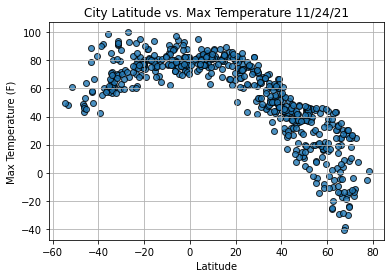

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.jpg")

# Show plot.
plt.show()

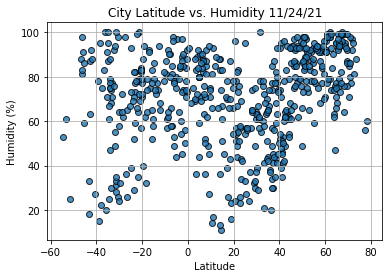

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.jpg")

# Show plot.
plt.show()

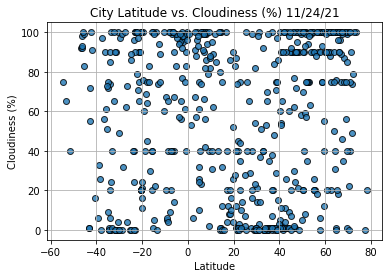

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.jpg")

# Show plot.
plt.show()

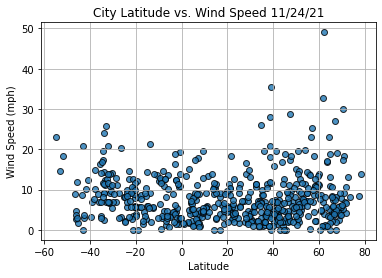

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.jpg")

# Show plot.
plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Port Hardy
Country                        CA
Date          2021-11-24 17:20:32
Lat                       50.6996
Lng                     -127.4199
Max Temp                     44.6
Humidity                       87
Cloudiness                     90
Wind Speed                  19.57
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gumdag,TM,2021-11-24 17:20:28,39.2061,54.5906,56.59,74,86,11.52
1,Kloulklubed,PW,2021-11-24 17:20:28,7.0419,134.2556,84.51,76,90,17.76
2,Vostok,RU,2021-11-24 17:20:29,46.4856,135.8833,7.70,97,100,3.96
4,Turinsk,RU,2021-11-24 17:20:29,58.0458,63.6960,16.25,91,100,8.75
5,Albany,US,2021-11-24 17:20:30,42.6001,-73.9662,39.67,49,1,7.40


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

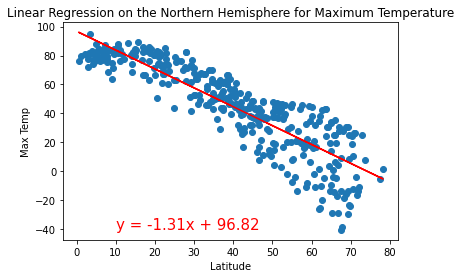

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,-40))

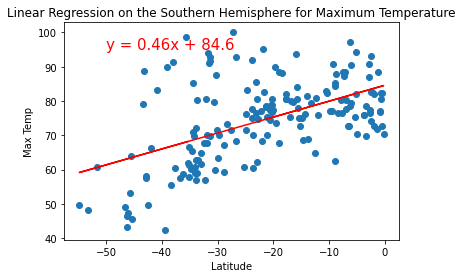

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,95))

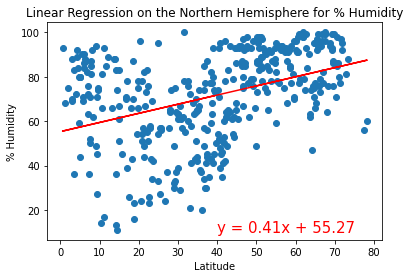

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

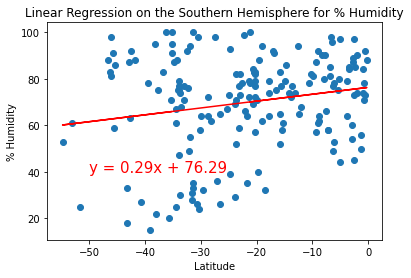

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,40))

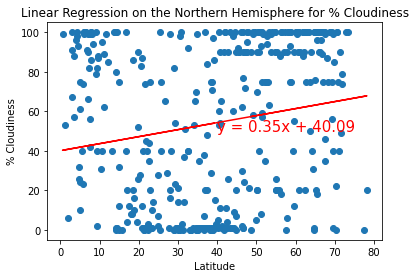

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,50))

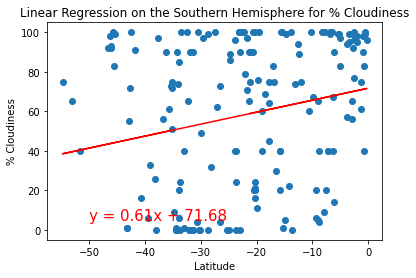

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,5))

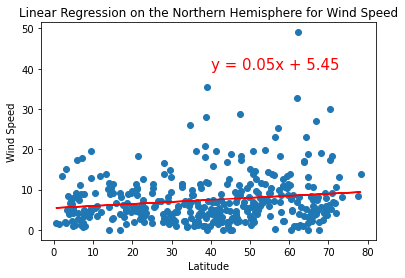

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,40))

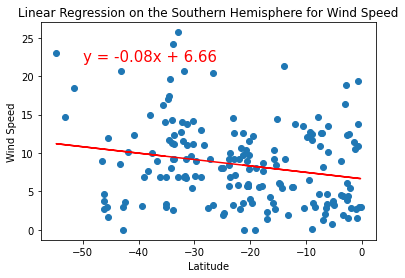

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,22))